<a href="https://colab.research.google.com/github/AnneA95/CIND820/blob/main/CIND820_Good_subset_helpful_v_non_helpful_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this workbook is completing the same exact analysis for the models, but now trying it on a labelled subset of data that is only for good reviews. The reason for this, is to see how well the model can predict helpfulness within one class of good reviews. Would like to see if the bad reviews were diluting the accuracy for helpfulness or not.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_data2.xlsx to clean_data2.xlsx


In [ ]:
df = pd.read_excel("clean_data2.xlsx")
df.head()

,category_id,category_id2,TYPE,TYPE2,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1,2,GOOD,NOT_HELPFUL,gp:AOqpTOEV727iQ2tWvxT6ip-RsfGrwNL0Z_5droJ1vEu...,Lucas Okie,https://play-lh.googleusercontent.com/a-/AOh14...,most accurate direction,5,0,4.75.0.3,2021-07-07 18:59:29,NaN,NaN
1,2,2,BAD,NOT_HELPFUL,gp:AOqpTOG13v43qeAR1YAqOUj-OL96Bm_BuHoZ3a0OQTy...,Hamim Bhuiyan,https://play-lh.googleusercontent.com/a-/AOh14...,yesterday road time second,1,0,4.57.2.0,2021-06-23 06:23:16,"Hi Hamim, thanks for contacting us. We'd like ...",2021-06-23 17:56:42
2,2,2,BAD,NOT_HELPFUL,gp:AOqpTOE4YSxa9TYa6An6B5-lBU22VxbAdE5zlMcB3GU...,Laura Cartersville,https://play-lh.googleusercontent.com/a/AATXAJ...,great pop ad annoying stuff stop,2,0,NaN,2021-08-25 18:35:42,NaN,NaN
3,2,2,BAD,NOT_HELPFUL,gp:AOqpTOH2PjCJ8qMAQg4ydYg47Wi0XTh9ff_sHQqUL8x...,Nazri Masrom,https://play-lh.googleusercontent.com/a-/AOh14...,terrible update,1,0,4.73.0.3,2021-05-16 00:39:43,NaN,NaN
4,1,1,GOOD,HELPFUL,gp:AOqpTOFFxa4ig_RpqJbDa1qgWLbU401puznwYUE72p5...,Phill Bozz,https://play-lh.googleusercontent.com/a/AATXAJ...,current version much advertising,3,1,4.74.0.3,2021-06-15 01:32:26,NaN,NaN


category id is 1 for good review, 2 for bad review. catgory id2 is 1 for helpful and 2 for not helpful

In [ ]:
df2 = df[(df['category_id'] == 1)]
df2.head()

,category_id,category_id2,TYPE,TYPE2,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1,2,GOOD,NOT_HELPFUL,gp:AOqpTOEV727iQ2tWvxT6ip-RsfGrwNL0Z_5droJ1vEu...,Lucas Okie,https://play-lh.googleusercontent.com/a-/AOh14...,most accurate direction,5,0,4.75.0.3,2021-07-07 18:59:29,NaN,NaN
4,1,1,GOOD,HELPFUL,gp:AOqpTOFFxa4ig_RpqJbDa1qgWLbU401puznwYUE72p5...,Phill Bozz,https://play-lh.googleusercontent.com/a/AATXAJ...,current version much advertising,3,1,4.74.0.3,2021-06-15 01:32:26,NaN,NaN
5,1,1,GOOD,HELPFUL,gp:AOqpTOEK7FFeA2B_7Gk9e-rbQPDTWcDOSumKy99B7n7...,Al Rodrgz,https://play-lh.googleusercontent.com/a/AATXAJ...,good,5,22,4.74.0.3,2021-06-01 09:32:19,NaN,NaN
6,1,1,GOOD,HELPFUL,gp:AOqpTOGnPevqgrba8O_-3s5OkyQp6cIf681ir66u_KF...,Gary A.,https://play-lh.googleusercontent.com/a/AATXAJ...,waze year solid reliable navigation use perfec...,4,3,4.68.2.0,2021-06-06 17:25:31,NaN,NaN
7,1,2,GOOD,NOT_HELPFUL,gp:AOqpTOG8h3rkSUDbAro9c6nk86HY2pI8zVYTKxP_6h8...,Melissa Bush,https://play-lh.googleusercontent.com/a-/AOh14...,thing wish accident police hazard exact locati...,3,0,NaN,2021-09-07 23:54:23,\nThanks for your feedback! We're always looki...,2021-09-08 14:56:24


In [ ]:
df2 = df2[['category_id2','TYPE2','content','score','thumbsUpCount']].copy()
df2.head()

,category_id2,TYPE2,content,score,thumbsUpCount
0,2,NOT_HELPFUL,most accurate direction,5,0
4,1,HELPFUL,current version much advertising,3,1
5,1,HELPFUL,good,5,22
6,1,HELPFUL,waze year solid reliable navigation use perfec...,4,3
7,2,NOT_HELPFUL,thing wish accident police hazard exact locati...,3,0


reducing columns so only relevant info present

In [ ]:
pd.DataFrame(df2.TYPE2.unique()).values

array([['NOT_HELPFUL'],
       ['HELPFUL']], dtype=object)

In [ ]:
pd.DataFrame(df2.TYPE2.unique())

,0
0,NOT_HELPFUL
1,HELPFUL


In [ ]:
df2['category_id2'] = df2['TYPE2'].factorize()[0]
category_id_df = df2[['TYPE2', 'category_id2']].drop_duplicates()


# dictionaries to link category id and type
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id2', 'TYPE2']].values)

# New dataframe
df2.head()

,category_id2,TYPE2,content,score,thumbsUpCount
0,0,NOT_HELPFUL,most accurate direction,5,0
4,1,HELPFUL,current version much advertising,3,1
5,1,HELPFUL,good,5,22
6,1,HELPFUL,waze year solid reliable navigation use perfec...,4,3
7,0,NOT_HELPFUL,thing wish accident police hazard exact locati...,3,0


dictionary for the category ID # and helpfulness type

In [ ]:
pip install matplotlib 

In [ ]:
import matplotlib.pyplot as plt

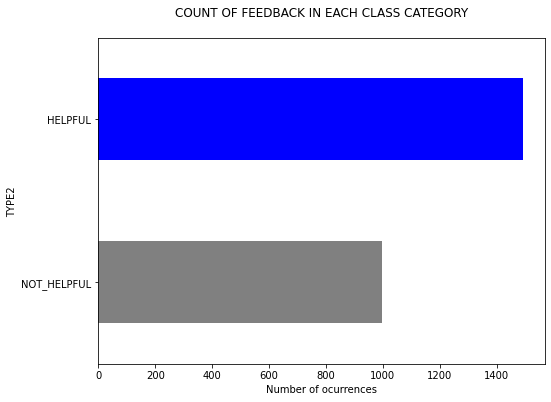

In [ ]:

fig = plt.figure(figsize=(8,6))
colors = ['grey','blue','green','orange']
df2.groupby('TYPE2').content.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'COUNT OF FEEDBACK IN EACH CLASS CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

seeing the distribution between helpful v non helpful reviews

In [ ]:
df2['content'] = df2['content'].astype(str)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df2.content).toarray()
labels = df2.category_id2
features.shape

(2528, 1377)

In [ ]:
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
import numpy

In [ ]:
import numpy as np

In [ ]:
X = df2['content'] 
y = df2['TYPE2']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

creating test train sets, 25% testing and 75% train

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

5 cross validation for four models, RF, linear, multi NB, and LR

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.668883,0.060282
LogisticRegression,0.690237,0.064893
MultinomialNB,0.619845,0.029081
RandomForestClassifier,0.611153,0.006761


comparing the accuracy and deviation

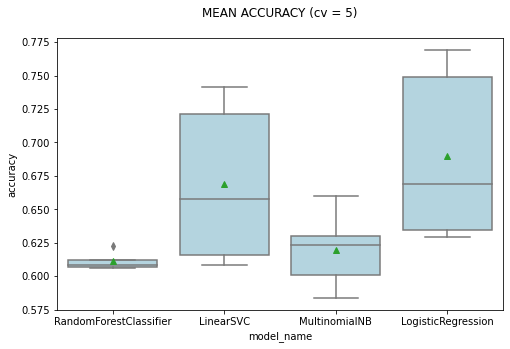

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=12);

visual representation with boxplot

In [ ]:
print(clf.predict(count_vect.transform(["hate"]))) #testing

['HELPFUL']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df2['content'], df2['TYPE2'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

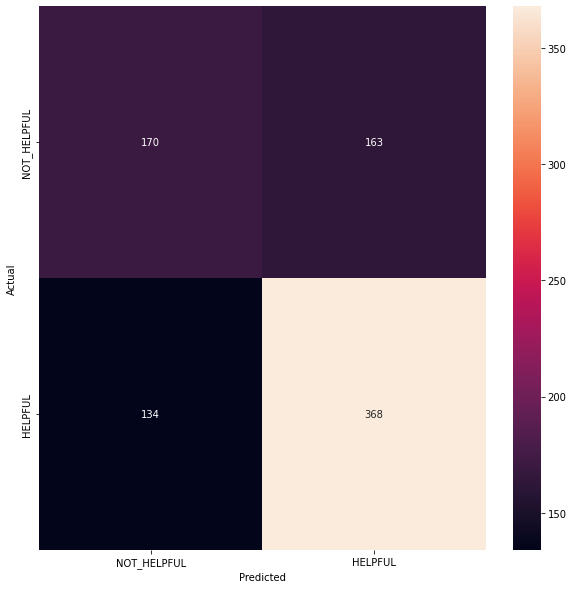

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

creating heat graphs to visually show the acutal v predicted accuracy. Linear does the best with helpful review predictions. this model over exaggerates helpfulness, with 73% predicted as helpful. based on actual dataset it should be closer to approx 60%

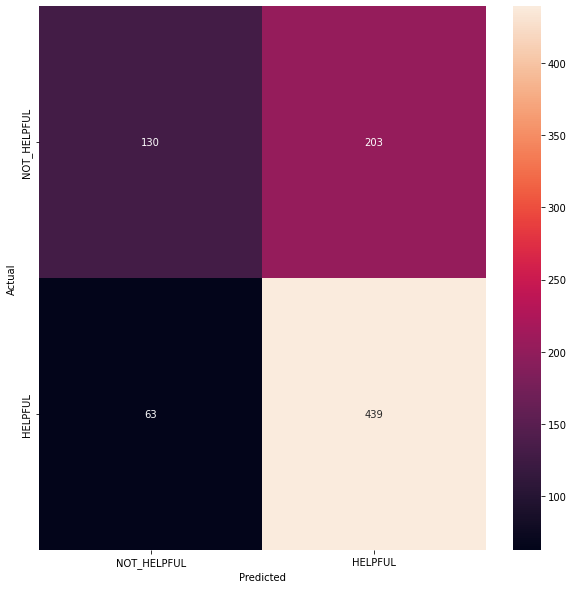

In [ ]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

LR model heavily skews towards predicting most reviews as helpful and is accurate but not able to properly pinpoint unhelpful reviews. LR better than linear for predicting non helpful reviews.

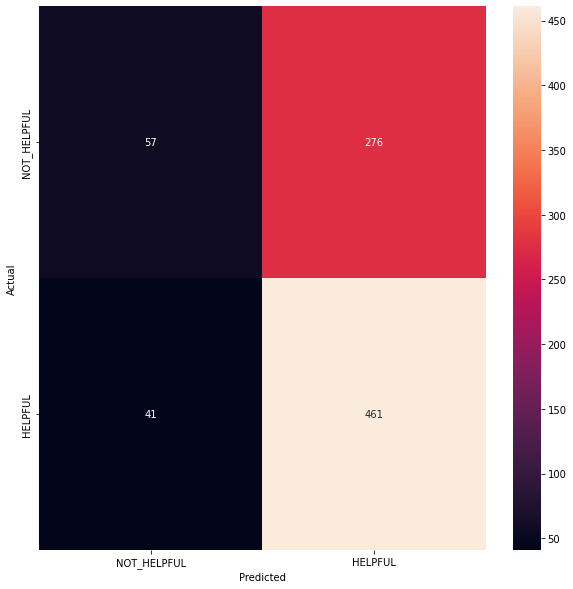

In [ ]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

MultinomialNB is not a great model to differentiate between helpful v non helpful. there are many not helpful reviews that are incorrectly predicted.

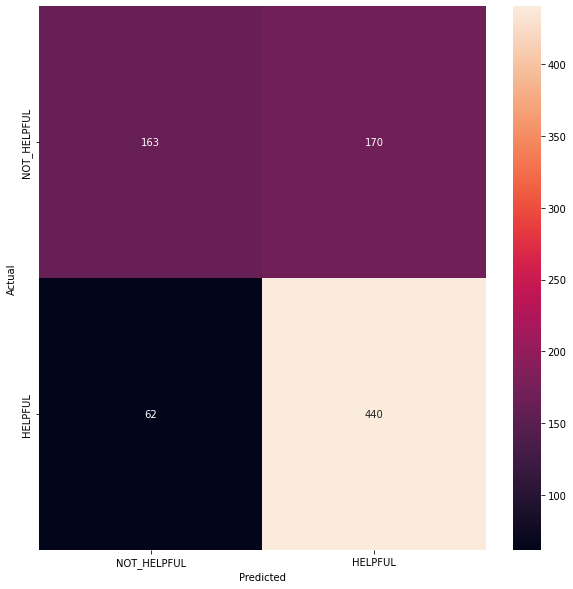

In [ ]:
model = RandomForestClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

RF is also good with predicting helpful reviews and on par with being as good at identifying not helpful reviews as the LR model

In [ ]:
from IPython.display import display
for predicted in category_id_df.category_id2:
  for actual in category_id_df.category_id2:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['TYPE2', 'content']])
      print('')


'HELPFUL' predicted as 'NOT_HELPFUL' : 62 examples.


,TYPE2,content
3625,HELPFUL,phone stock awful detour way town route arse e...
3962,HELPFUL,couple long trip way alternate road necessary ...
4793,HELPFUL,uninstalled internet connection error fine int...
4585,HELPFUL,great road other other accident road great
2137,HELPFUL,amount time toll minute time course week ointe...
...,...,...
4373,HELPFUL,map late first day work map wrong location lad...
3838,HELPFUL,user street location arrival state destination...
197,HELPFUL,problem thank guy
218,HELPFUL,excellent



'NOT_HELPFUL' predicted as 'HELPFUL' : 170 examples.


,TYPE2,content
3676,NOT_HELPFUL,love developer voice lady camera annoying scre...
1927,NOT_HELPFUL,sound low traffic medium setting max uninstall...
57,NOT_HELPFUL,easy way report day indicate street closure ca...
250,NOT_HELPFUL,star different location pull get enter address
92,NOT_HELPFUL,doordash occasional street car enthusiast easy...
...,...,...
4945,NOT_HELPFUL,countless time known route heavy traffic road ...
1712,NOT_HELPFUL,significant limitation download line area poor...
562,NOT_HELPFUL,good star stuff great love voice friend
1489,NOT_HELPFUL,helpful long trip city police night recommend


viewing the content for the incorrectly predicted classes

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df2['TYPE2'].unique()))

              precision    recall  f1-score   support

 NOT_HELPFUL       0.72      0.49      0.58       333
     HELPFUL       0.72      0.88      0.79       502

    accuracy                           0.72       835
   macro avg       0.72      0.68      0.69       835
weighted avg       0.72      0.72      0.71       835



looking at the overall precision, recall, and F score for model. the recall for helpful is much better then nonhelpful and the model has an easier time identifying content in this class than non-helpful. although precision is the same the recall significantly affects the class predictions for not helpful.